In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
# Создаем данные
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

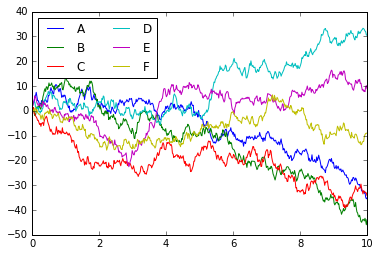

In [4]:
# Рисуем график, используя параметры Matplotlib по умолчанию
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [5]:
import seaborn as sns
sns.set()

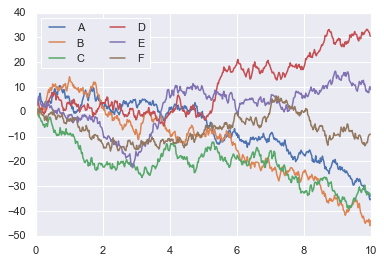

In [6]:
# Тот же самый код для построения графика, что и выше!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


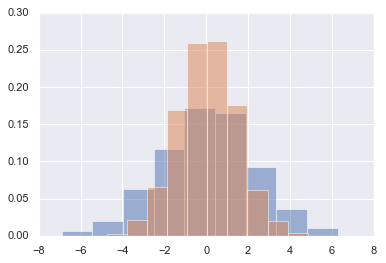

In [7]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

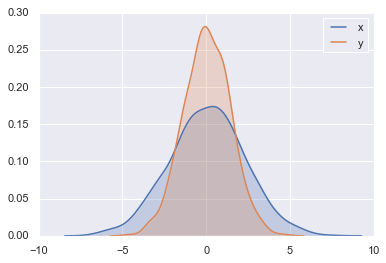

In [8]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

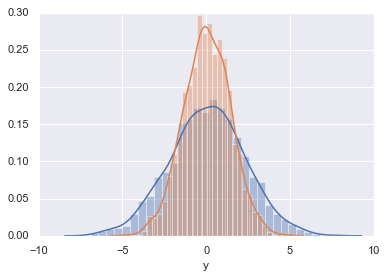

In [9]:
sns.distplot(data['x'])
sns.distplot(data['y'])

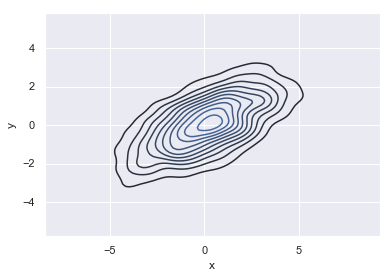

In [10]:
sns.kdeplot(data['x'], data['y'])

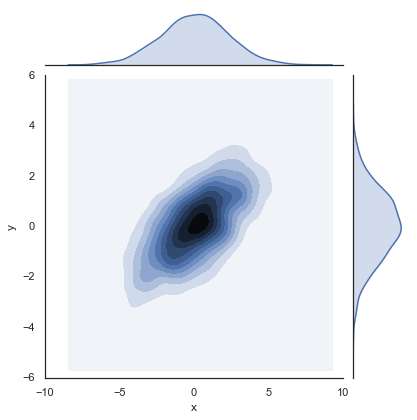

In [11]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

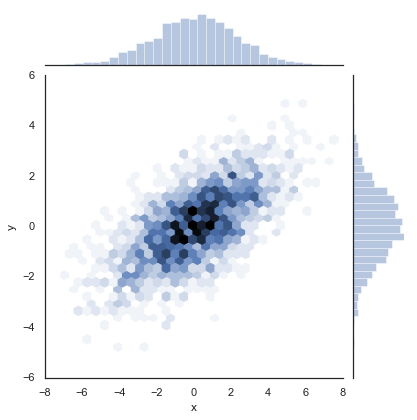

In [12]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

In [13]:
iris = sns.load_dataset("iris")
iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


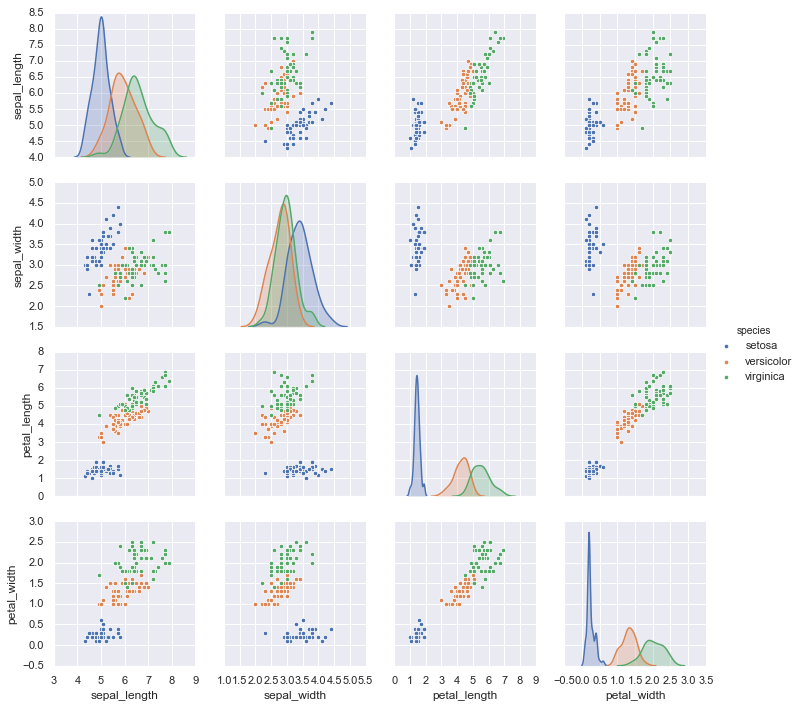

In [14]:
sns.pairplot(iris, hue='species', size=2.5)

In [15]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


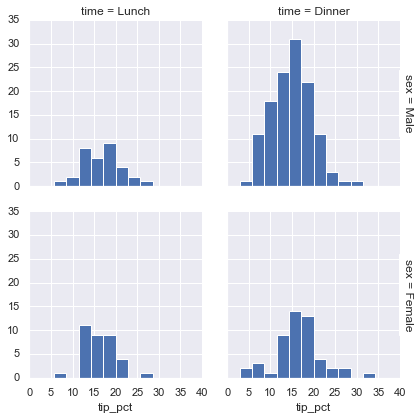

In [16]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

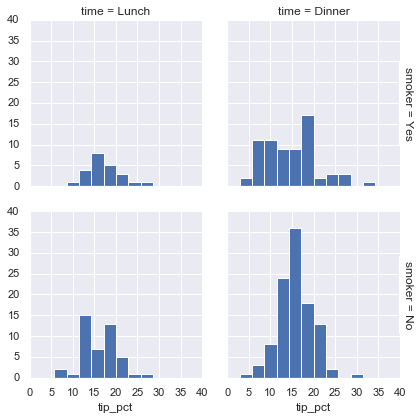

In [17]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


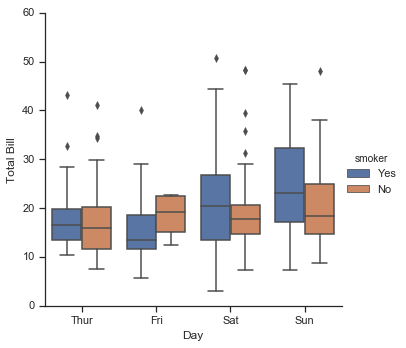

In [18]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "smoker", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill"); # День; Итого

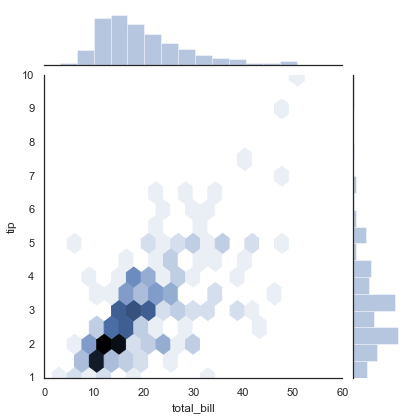

In [19]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

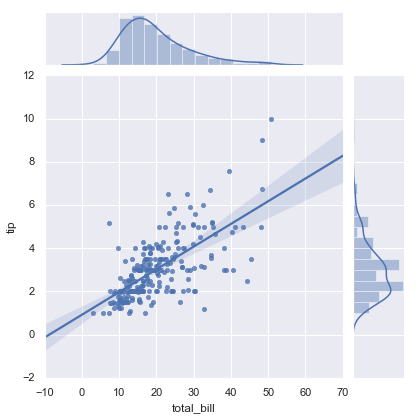

In [20]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg')

In [21]:
planets = sns.load_dataset('planets')
planets.head(20)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100,77.40,2006
1,Radial Velocity,1,874.774000,2.210,56.95,2008
2,Radial Velocity,1,763.000000,2.600,19.84,2011
3,Radial Velocity,1,326.030000,19.400,110.62,2007
4,Radial Velocity,1,516.220000,10.500,119.47,2009
5,Radial Velocity,1,185.840000,4.800,76.39,2008
6,Radial Velocity,1,1773.400000,4.640,18.15,2002
7,Radial Velocity,1,798.500000,NaN,21.41,1996
8,Radial Velocity,1,993.300000,10.300,73.10,2008
9,Radial Velocity,2,452.800000,1.990,74.79,2010


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


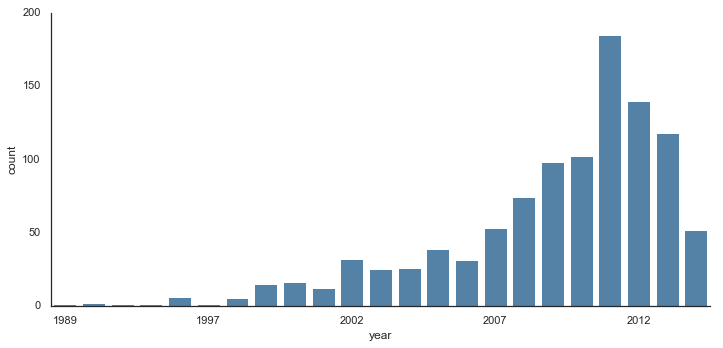

In [22]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,  # Год
                       kind="count", color='steelblue') # Количество
    g.set_xticklabels(step=5)

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


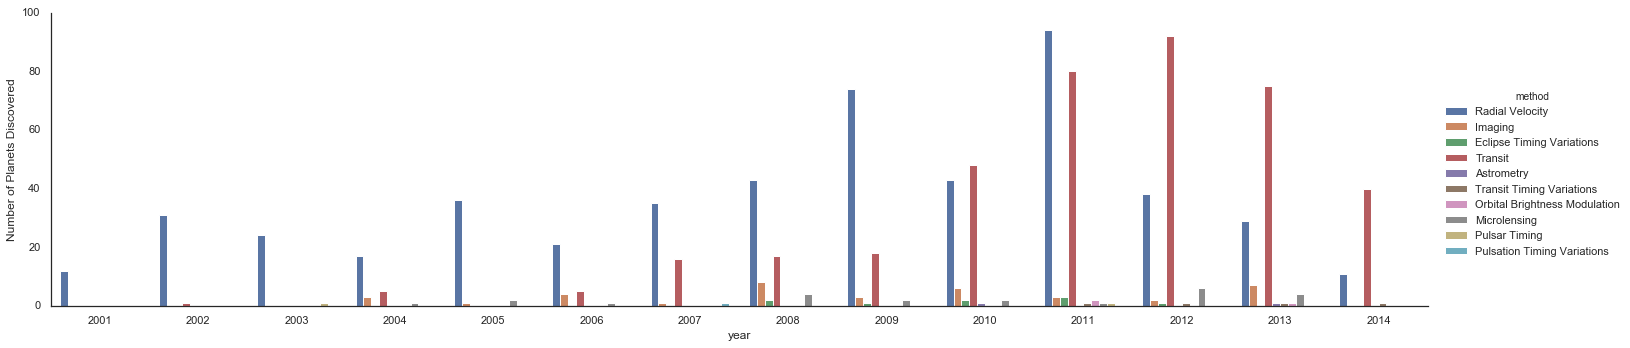

In [23]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')
            # Количество обнаруженных планет

In [69]:
data = pd.read_csv('./data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [70]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [72]:
data['split'] = pd.to_timedelta(data['split'])

In [73]:
#data['final'] = pd.to_datetime(data['final']).dt.time
data['final'] = pd.to_timedelta(data['final'])

In [74]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [75]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [76]:
data['split_sec'] = data['split'].astype(np.int64) / 1E9
data['final_sec'] = data['final'].astype(np.int64) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


In [77]:
data.dtypes

age                    int64
gender                object
split        timedelta64[ns]
final        timedelta64[ns]
split_sec            float64
final_sec            float64
dtype: object